Select Disease-Symptom Data File


Saving sd.csv to sd (2).csv
File provided: sd (2).csv
DataFrame loaded successfully. Shape: (4920, 18)

Model Evaluation:

Naive Bayes Accuracy: 1.00
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
    

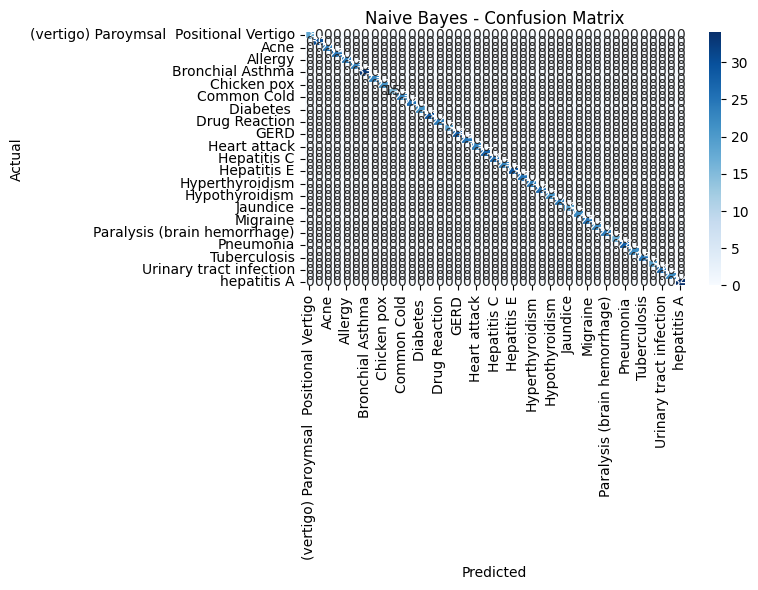

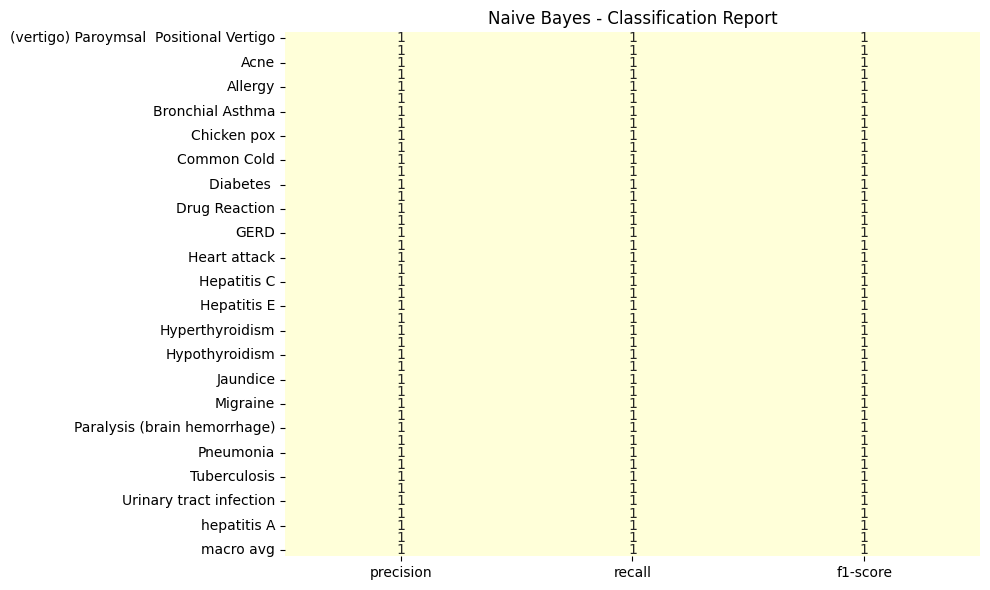


Logistic Regression Accuracy: 1.00
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
  

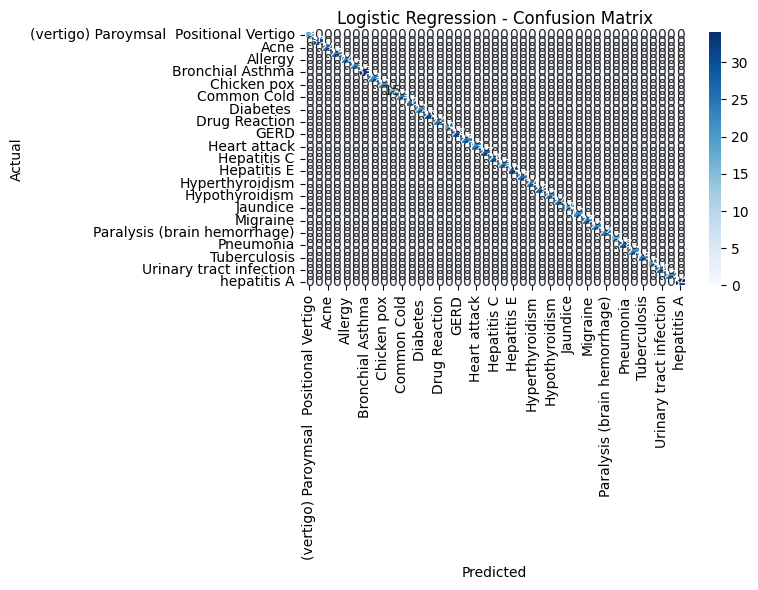

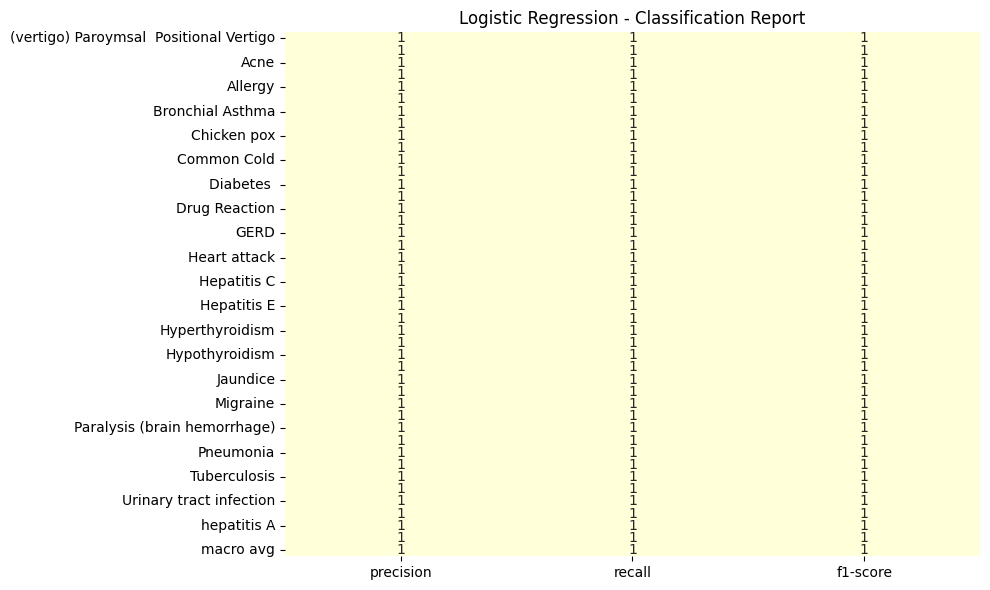


Decision Tree Accuracy: 1.00
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16  

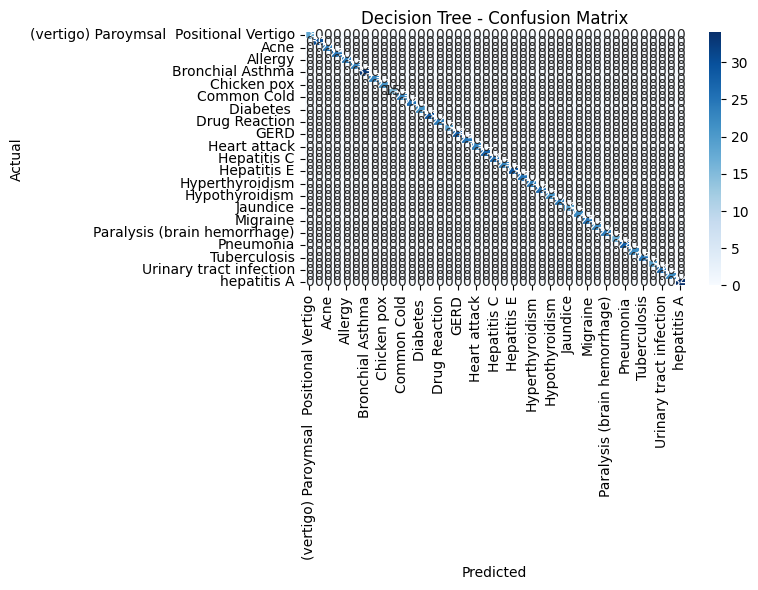

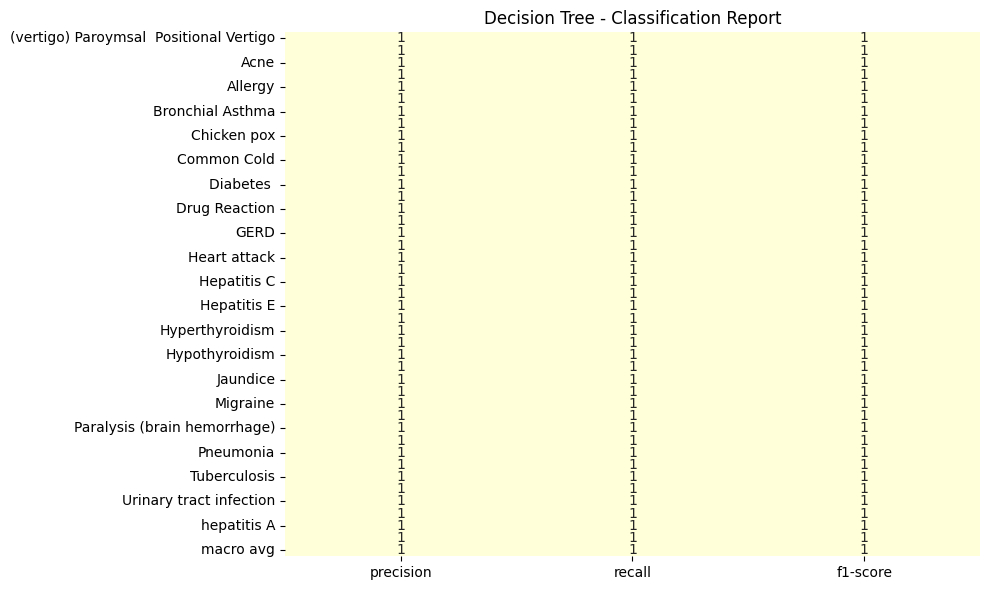


Random Forest Accuracy: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16  

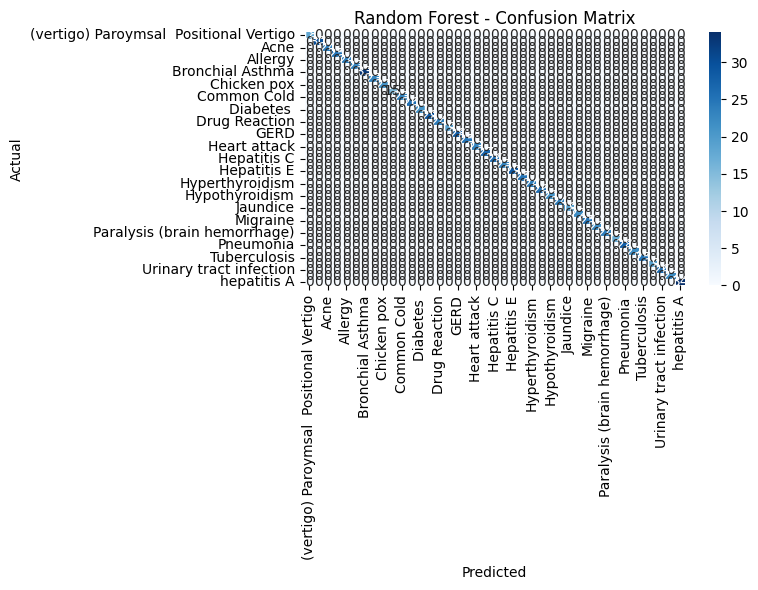

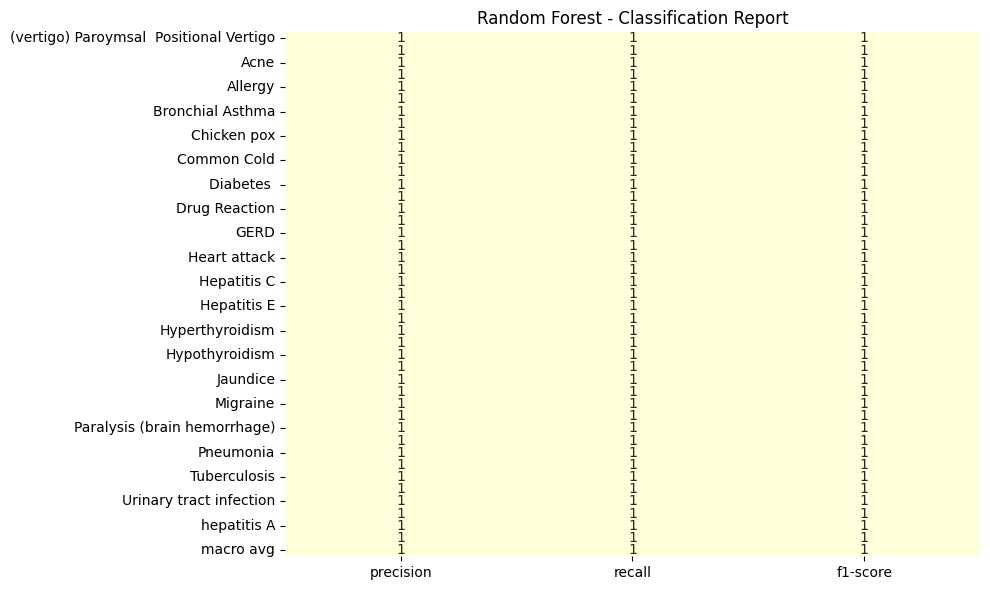

Select Disease-Precaution Data File


Saving Disease precaution.csv to Disease precaution (1).csv
File provided: Disease precaution (1).csv
DataFrame loaded successfully. Shape: (41, 5)

Enter symptoms (comma-separated), or 'exit' to quit: rash,throat pain
Naive Bayes: Acne
Logistic Regression: Acne
Decision Tree: Arthritis
Random Forest: Acne
Predicted Disease (by majority vote): Acne
Precaution 1: bath twice
Precaution 2: avoid fatty spicy food
Precaution 3: drink plenty of water
Precaution 4: avoid too many products


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io
import os
from google.colab import files

warnings.filterwarnings('ignore')


def upload_file(title="Select file"):
    """
    Function to upload file using Colab's file upload mechanism.
    """
    print(title)
    uploaded = files.upload()
    if len(uploaded) == 0:
        raise FileNotFoundError("No file selected.")
    file_path = next(iter(uploaded))  # Get the first uploaded file name
    print(f"File provided: {file_path}")
    return file_path


def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"DataFrame loaded successfully. Shape: {df.shape}")
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None


def preprocess_data(df):
    try:
        symptom_cols = [f"Symptom_{i}" for i in range(1, 18)]
        df['Symptoms'] = df[symptom_cols].apply(
            lambda row: ','.join(row.dropna().astype(str)), axis=1
        )
        df['Symptoms'] = df['Symptoms'].apply(
            lambda x: [s.strip().replace('_', ' ') for s in x.split(',') if isinstance(x, str)])

        all_symptoms = sorted(set(s for row in df['Symptoms'] for s in row))

        for symptom in all_symptoms:
            df[symptom] = df['Symptoms'].apply(lambda x: 1 if symptom in x else 0)

        label_encoder = LabelEncoder()
        df['Disease'] = label_encoder.fit_transform(df['Disease'])

        df = df.drop(columns=symptom_cols + ['Symptoms'])
        return df, label_encoder, all_symptoms
    except Exception as e:
        print(f"Preprocessing error: {e}")
        return None, None, None


def split_data(df):
    try:
        X = df.drop(columns=['Disease'])
        y = df['Disease']
        return train_test_split(X, y, test_size=0.2, random_state=42)
    except Exception as e:
        print(f"Splitting error: {e}")
        return None, None, None, None


def train_models(X_train, y_train):
    models = {
        "Naive Bayes": MultinomialNB(),
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
    return models


def visualize_evaluation(y_test, y_pred, label_encoder, model_name):
    labels = label_encoder.inverse_transform(sorted(set(y_test)))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()

    # Classification report
    report_dict = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()

    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", cbar=False)
    plt.title(f"{model_name} - Classification Report")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


def evaluate_models(models, X_test, y_test, label_encoder):
    print("\nModel Evaluation:")
    for name, model in models.items():
        try:
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"\n{name} Accuracy: {acc:.2f}")
            print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

            # Visualization
            visualize_evaluation(y_test, y_pred, label_encoder, name)

        except Exception as e:
            print(f"Error evaluating {name}: {e}")


def predict_with_majority(symptoms_input, models, label_encoder, all_symptoms, precautions_data):
    try:
        input_symptoms = [s.strip().lower().replace('_', ' ') for s in symptoms_input]
        matched_symptoms = []
        input_data = pd.DataFrame([[0] * len(all_symptoms)], columns=all_symptoms)

        for symptom in input_symptoms:
            for known in all_symptoms:
                if symptom in known.lower():
                    matched_symptoms.append(known)
                    input_data.at[0, known] = 1
                    break

        if not matched_symptoms:
            return "No valid symptoms provided."

        predictions = []
        for name, model in models.items():
            pred_encoded = model.predict(input_data)[0]
            pred_label = label_encoder.inverse_transform([pred_encoded])[0]
            predictions.append(pred_label)
            print(f"{name}: {pred_label}")

        final_prediction = max(set(predictions), key=predictions.count)

        # Get precautions for the predicted disease
        precaution_data = precautions_data[precautions_data['Disease'] == final_prediction]

        if precaution_data.empty:
            precaution_message = "No precaution available for the predicted disease."
        else:
            # Collect all precaution columns and join them into a single message
            precaution_columns = [f'Precaution_{i}' for i in range(1, 5)]
            precautions = precaution_data[precaution_columns].dropna(axis=1, how='all').values.flatten()

            if len(precautions) == 0:
                precaution_message = "No precaution available for the predicted disease."
            else:
                precaution_message = "\n".join([f"Precaution {i+1}: {precautions[i]}" for i in range(len(precautions))])

        return f"Predicted Disease (by majority vote): {final_prediction}\n{precaution_message}"

    except Exception as e:
        return f"Prediction error: {e}"


def main():
    try:
        # Upload Disease-Symptom Data
        file_path_symptoms = upload_file(title="Select Disease-Symptom Data File")
        df = load_data(file_path_symptoms)
        if df is None:
            return

        # Preprocess Disease-Symptom Data
        df, label_encoder, all_symptoms = preprocess_data(df)
        if df is None:
            return

        # Split Data into Train and Test
        X_train, X_test, y_train, y_test = split_data(df)
        if X_train is None:
            return

        # Train Models
        models = train_models(X_train, y_train)

        # Evaluate Models
        evaluate_models(models, X_test, y_test, label_encoder)

        # Upload Disease-Precaution Data
        file_path_precautions = upload_file(title="Select Disease-Precaution Data File")
        precautions_data = load_data(file_path_precautions)
        if precautions_data is None:
            return

        # Main Loop to Enter Symptoms and Predict Disease
        while True:
            selected_symptoms_input = input("\nEnter symptoms (comma-separated), or 'exit' to quit: ")
            if selected_symptoms_input.lower() == 'exit':
                break

            selected_symptoms = [s.strip() for s in selected_symptoms_input.split(',')]
            result = predict_with_majority(selected_symptoms, models, label_encoder, all_symptoms, precautions_data)
            print(result)

    except Exception as e:
        print(f"Error in main: {e}")


if __name__ == "__main__":
    main()
